In [50]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import libpysal
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

# Read the CSV file
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]

df = pd.read_csv("adult.csv", names=columns, skipinitialspace=True)


In [51]:
# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill NaN values with a blank space for categorical columns
categorical_columns = ['workclass', 'occupation', 'native-country']
df[categorical_columns] = df[categorical_columns].fillna('')

# Remove rows with blank occupations
df = df[df['occupation'] != '']

# Verify the cleaning steps
print(f"Number of rows after cleaning: {df.shape[0]}")
print(f"Number of missing values per column:\n{df.isnull().sum()}")


Number of rows after cleaning: 32537
Number of missing values per column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


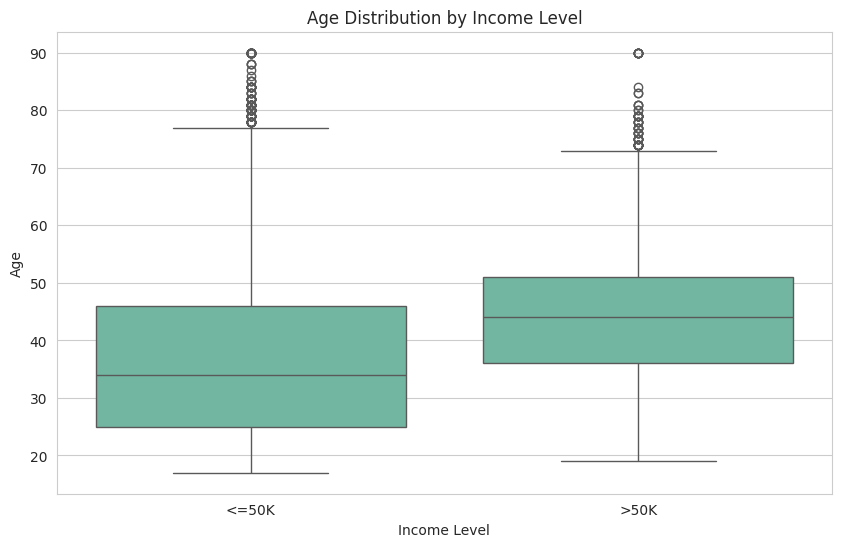

In [52]:
# 1. Box-and-Whisker Plot for Age Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Age')
plt.show()

/tmp/ipykernel_408706/60520996.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', 'education', 'income']).size().unstack(fill_value=0)


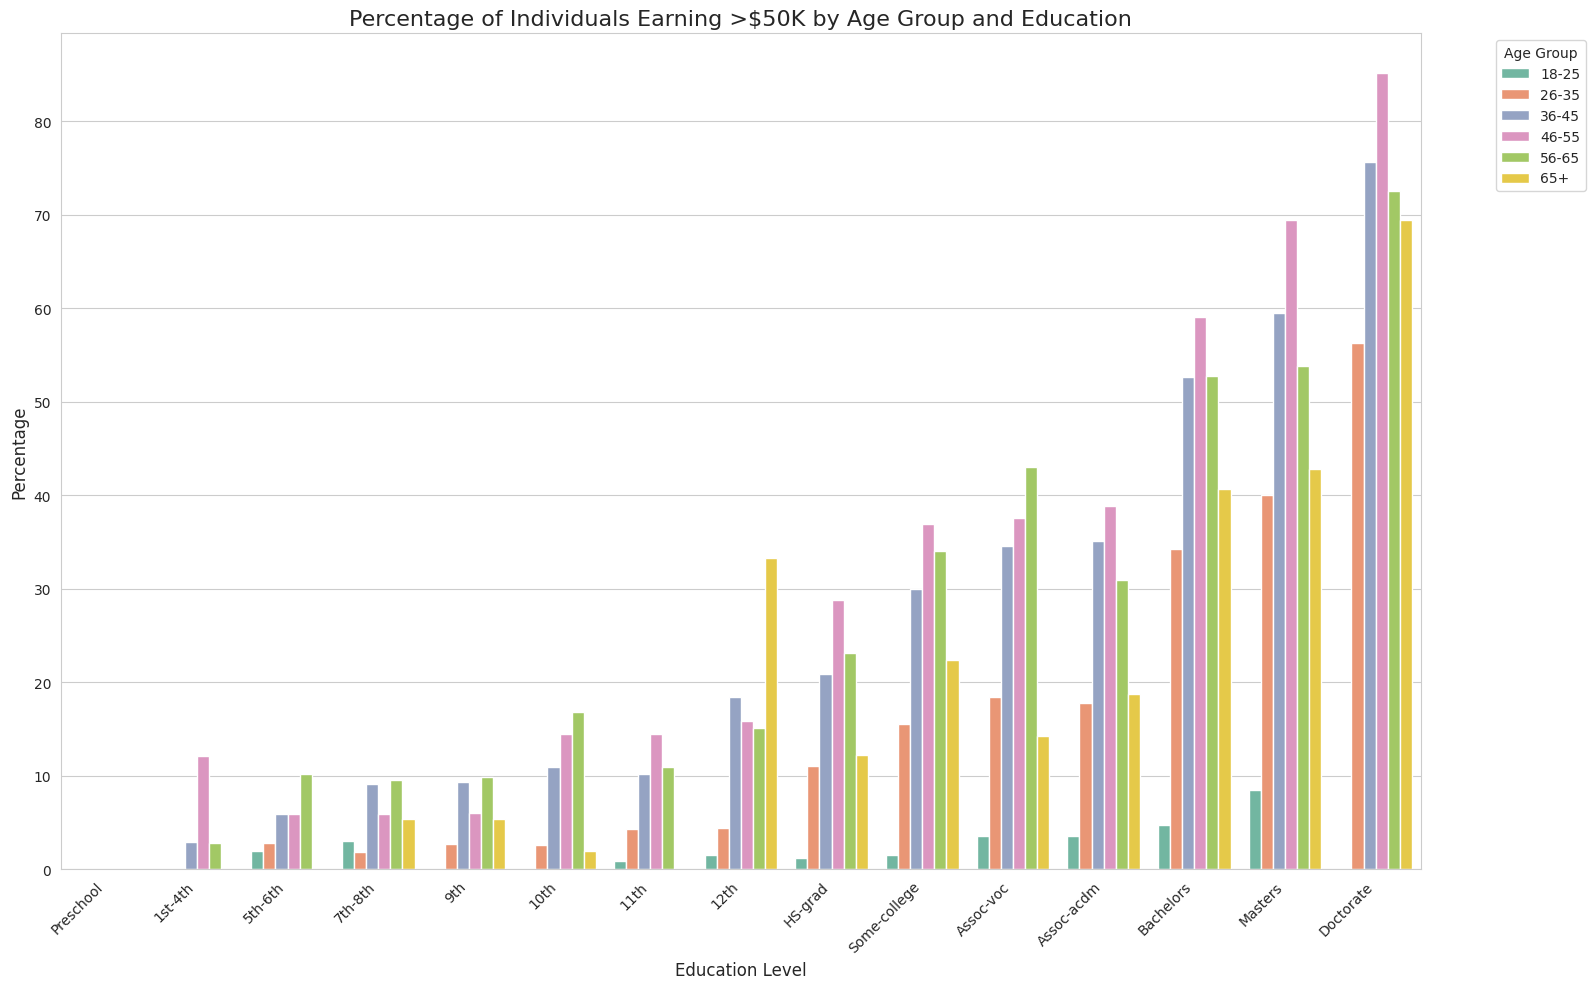

Percentage of individuals earning >$50K by education level:
education
Doctorate       59.861924
Masters         45.709091
Bachelors       40.712742
Assoc-voc       25.259546
Assoc-acdm      24.156954
Some-college    23.410164
HS-grad         16.230573
12th            14.806397
10th             7.805389
11th             6.832650
7th-8th          5.813681
9th              5.563958
5th-6th          4.485621
1st-4th          2.986589
Preschool        0.000000
Name: >50K, dtype: float64

Percentage of individuals earning >$50K by age group:
age_group
46-55    28.725913
56-65    25.731216
36-45    25.022494
65+      17.782769
26-35    14.150929
18-25     2.040791
Name: >50K, dtype: float64

Top 3 education levels with highest percentage of individuals earning >$50K:
education
Doctorate    59.861924
Masters      45.709091
Bachelors    40.712742
Name: >50K, dtype: float64

Age group with highest percentage of individuals earning >$50K:
age_group
46-55    28.725913
Name: >50K, dtype: float64


/tmp/ipykernel_408706/60520996.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_percentages = grouped_percentages['>50K'].groupby('education').mean()
/tmp/ipykernel_408706/60520996.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_percentages = grouped_percentages['>50K'].groupby('age_group').mean()


In [54]:
# Data preparation for Grouped Bar Chart
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Doctorate']
df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)

# Calculate percentages
grouped = df.groupby(['age_group', 'education', 'income']).size().unstack(fill_value=0)
grouped_percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_palette("Set2")

ax = sns.barplot(x='education', y='>50K', hue='age_group', data=grouped_percentages['>50K'].reset_index())

plt.title('Percentage of Individuals Earning >$50K by Age Group and Education', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display some statistics
print("Percentage of individuals earning >$50K by education level:")
education_percentages = grouped_percentages['>50K'].groupby('education').mean()
print(education_percentages.sort_values(ascending=False))

print("\nPercentage of individuals earning >$50K by age group:")
age_group_percentages = grouped_percentages['>50K'].groupby('age_group').mean()
print(age_group_percentages.sort_values(ascending=False))

# Top 3 education levels
print("\nTop 3 education levels with highest percentage of individuals earning >$50K:")
top_3_education = education_percentages.sort_values(ascending=False).head(3)
print(top_3_education)

# Top age group
print("\nAge group with highest percentage of individuals earning >$50K:")
top_age_group = age_group_percentages.sort_values(ascending=False).head(1)
print(top_age_group)

<Figure size 2000x1000 with 0 Axes>

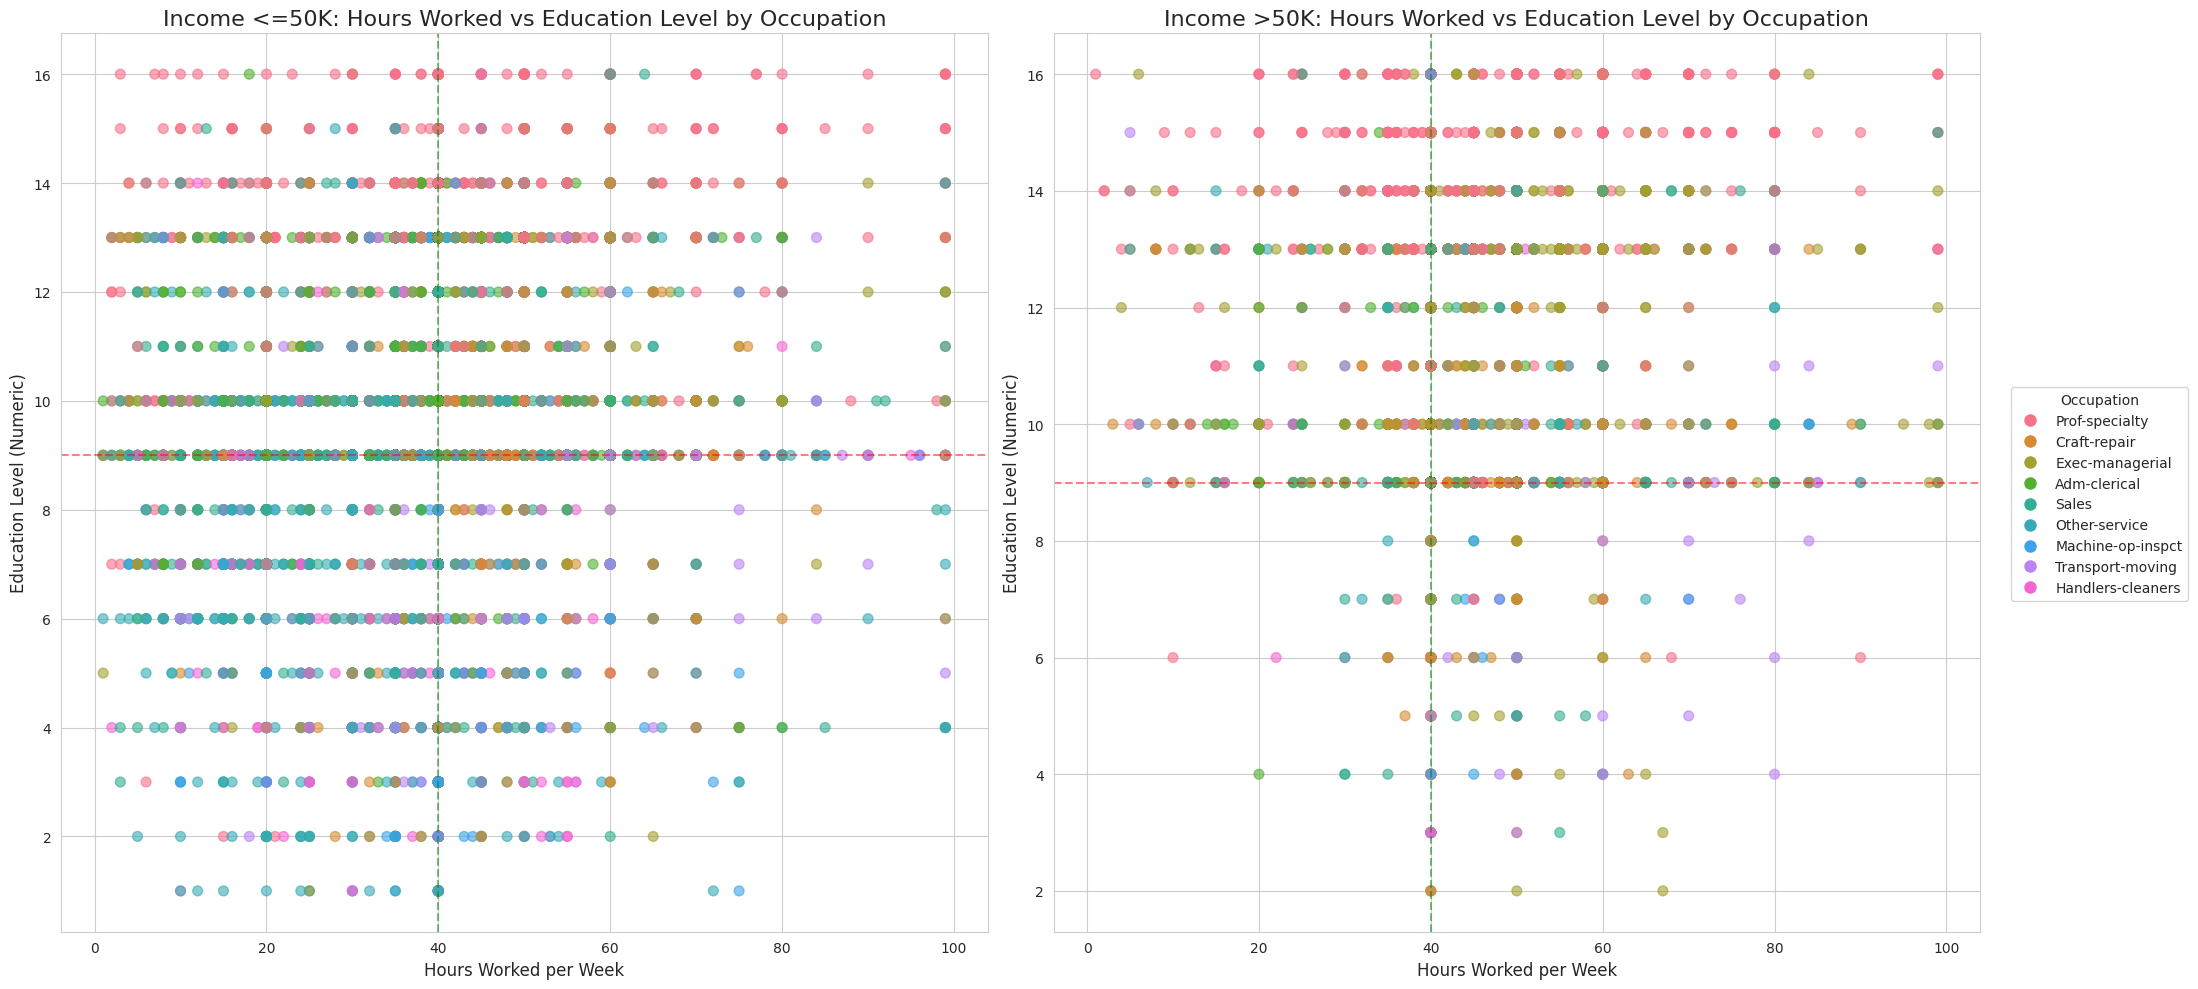


Statistics for income group: <=50K
Average hours worked per week by occupation:
occupation
Transport-moving     43.624902
Exec-managerial      42.816881
Craft-repair         41.609795
Machine-op-inspct    40.383781
Prof-specialty       40.117208
Sales                38.329959
Handlers-cleaners    37.613406
Adm-clerical         37.039865
Other-service        34.342105
Name: hours-per-week, dtype: float64

Average education level by occupation:
occupation
Prof-specialty       12.378402
Exec-managerial      10.839294
Adm-clerical         10.016559
Sales                 9.904012
Craft-repair          8.910900
Other-service         8.716233
Transport-moving      8.653093
Handlers-cleaners     8.457521
Machine-op-inspct     8.362079
Name: education-num, dtype: float64

Percentage of individuals in each occupation:
occupation
Adm-clerical         15.578274
Craft-repair         15.119668
Other-service        15.067119
Sales                12.740649
Prof-specialty       10.882339
Exec-manageri

In [57]:
# Data preparation for Scatter Plots
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")

# Select top N occupations by frequency
N = 10  # You can adjust this number
top_occupations = df['occupation'].value_counts().nlargest(N).index

# Filter the dataframe to include only top occupations
df_top = df[df['occupation'].isin(top_occupations)]

# Create a copy of the dataframe for this specific plot
df_cleaned = df_top.copy()

# Remove rows with blank occupations in the copied dataframe
df_cleaned = df_cleaned[df_cleaned['occupation'] != '']

# Update the top occupations based on the cleaned data
top_occupations_cleaned = df_cleaned['occupation'].value_counts().index

# Create a categorical color map for cleaned occupations
color_map_cleaned = dict(zip(top_occupations_cleaned, sns.color_palette("husl", n_colors=len(top_occupations_cleaned))))

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Function to create scatter plot
def create_scatter(ax, data, title):
    scatter = ax.scatter(data['hours-per-week'], 
                         data['education-num'], 
                         c=data['occupation'].map(color_map_cleaned), 
                         alpha=0.6,
                         s=50)
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Hours Worked per Week', fontsize=12)
    ax.set_ylabel('Education Level (Numeric)', fontsize=12)
    
    # Add a horizontal line at education-num = 9 (approximately high school level)
    ax.axhline(y=9, color='r', linestyle='--', alpha=0.5)
    
    # Add a vertical line at 40 hours per week
    ax.axvline(x=40, color='g', linestyle='--', alpha=0.5)
    
    return scatter

# Create scatter plot for <=50K
scatter1 = create_scatter(ax1, df_cleaned[df_cleaned['income'] == '<=50K'], 'Income <=50K: Hours Worked vs Education Level by Occupation')

# Create scatter plot for >50K
scatter2 = create_scatter(ax2, df_cleaned[df_cleaned['income'] == '>50K'], 'Income >50K: Hours Worked vs Education Level by Occupation')

# Create a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=occupation, 
                   markerfacecolor=color, markersize=10) 
                   for occupation, color in color_map_cleaned.items()]
fig.legend(handles=legend_elements, title="Occupation", loc="center right", bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

# Display some statistics
for income_group in ['<=50K', '>50K']:
    df_income = df_cleaned[df_cleaned['income'] == income_group]
    
    print(f"\nStatistics for income group: {income_group}")
    
    print("Average hours worked per week by occupation:")
    avg_hours = df_income.groupby('occupation')['hours-per-week'].mean().sort_values(ascending=False)
    print(avg_hours)

    print("\nAverage education level by occupation:")
    avg_education = df_income.groupby('occupation')['education-num'].mean().sort_values(ascending=False)
    print(avg_education)

    print("\nPercentage of individuals in each occupation:")
    occupation_percentages = df_income['occupation'].value_counts(normalize=True) * 100
    print(occupation_percentages.sort_values(ascending=False))


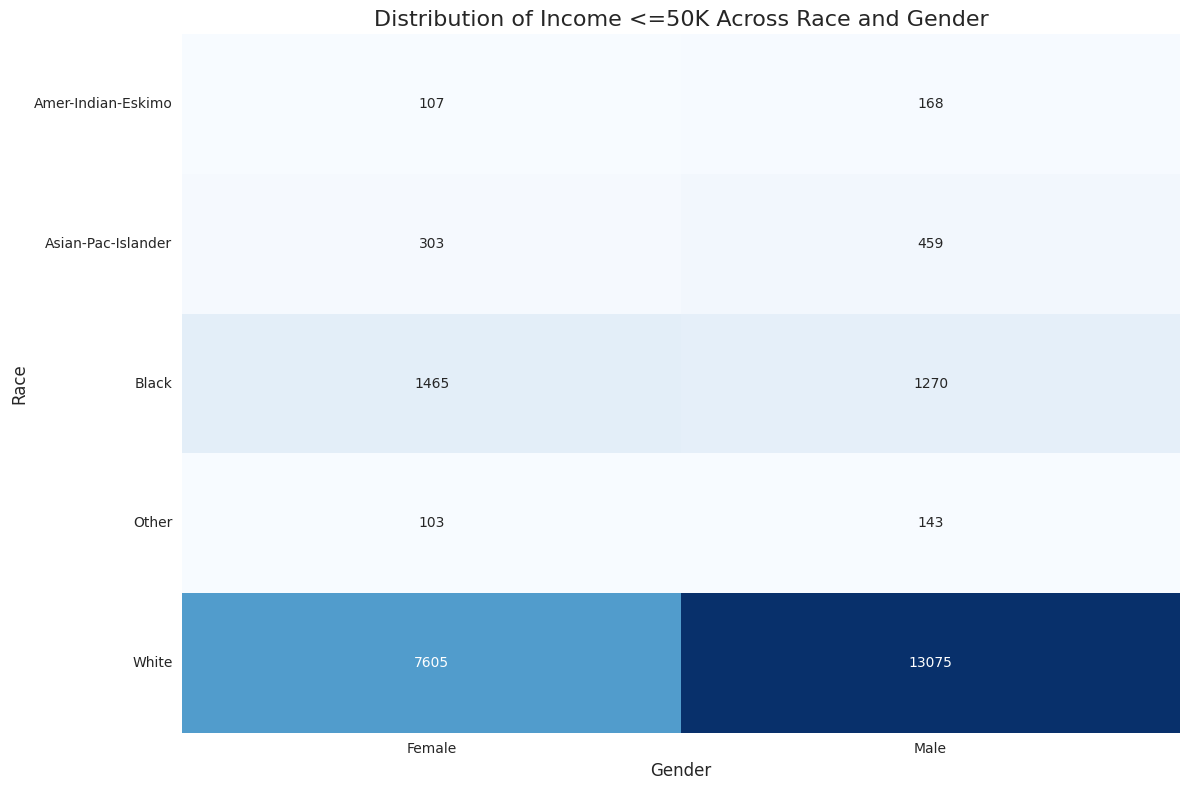

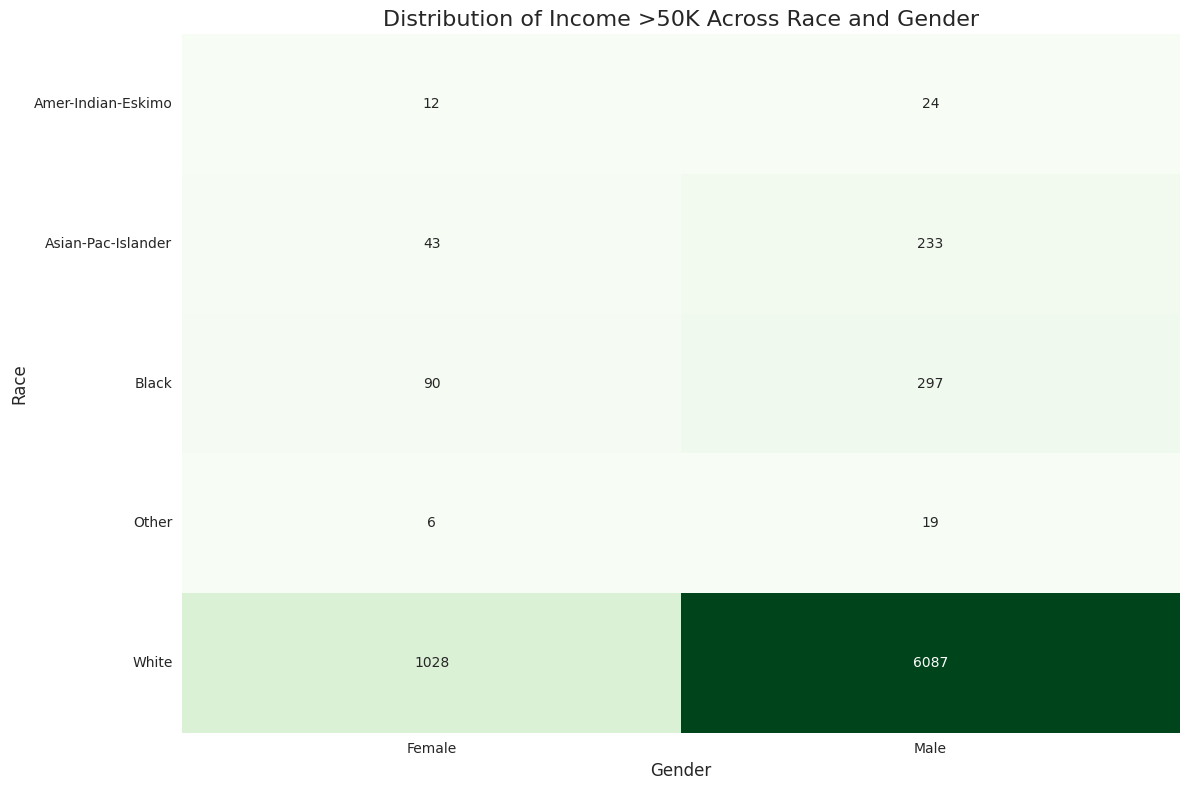

Percentage of individuals earning >$50K by race and gender:
sex                    Female       Male
race                                    
Amer-Indian-Eskimo  10.084034  12.500000
Asian-Pac-Islander  12.427746  33.670520
Black                5.787781  18.953414
Other                5.504587  11.728395
White               11.907796  31.765995

Total count of individuals by race and gender:
sex                 Female   Male
race                             
Amer-Indian-Eskimo     119    192
Asian-Pac-Islander     346    692
Black                 1555   1567
Other                  109    162
White                 8633  19162


In [63]:
# Prepare data for heatmaps
heatmap_data_le50k = df[df['income'] == '<=50K'].groupby(['race', 'sex']).size().unstack(fill_value=0)
heatmap_data_gt50k = df[df['income'] == '>50K'].groupby(['race', 'sex']).size().unstack(fill_value=0)

# Plot heatmap for <=50K income group
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_le50k, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Distribution of Income <=50K Across Race and Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Race', fontsize=12)
plt.tight_layout()
plt.show()

# Plot heatmap for >50K income group
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_gt50k, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Distribution of Income >50K Across Race and Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Race', fontsize=12)
plt.tight_layout()
plt.show()

# Display some statistics
print("Percentage of individuals earning >$50K by race and gender:")
income_by_race_gender = df.groupby(['race', 'sex'])['income'].apply(lambda x: (x == '>50K').mean() * 100).unstack()
print(income_by_race_gender)

print("\nTotal count of individuals by race and gender:")
count_by_race_gender = df.groupby(['race', 'sex']).size().unstack()
print(count_by_race_gender)

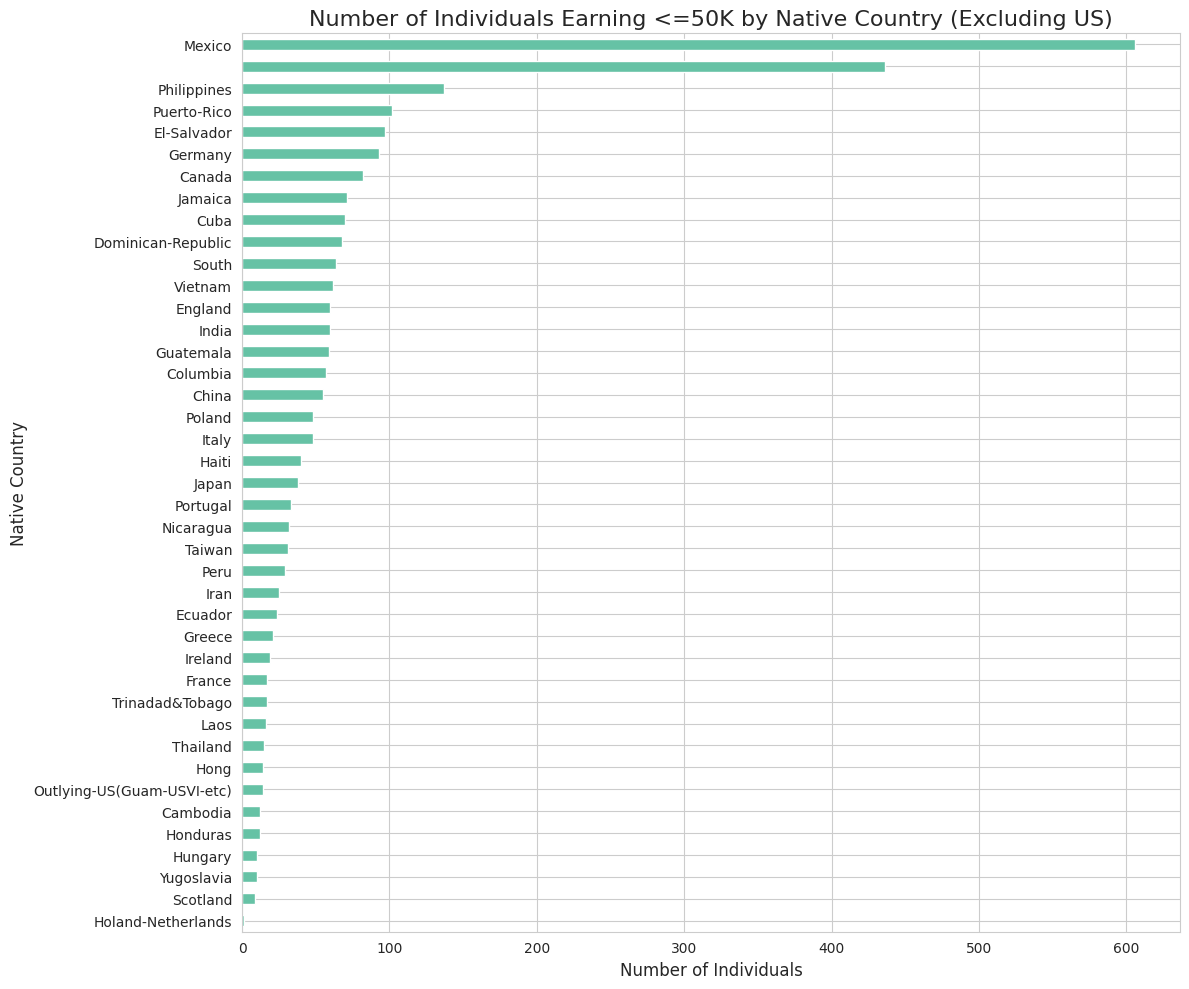

Top 10 countries (excluding US) with the most individuals earning <=50K:
native-country
Mexico                606
                      436
Philippines           137
Puerto-Rico           102
El-Salvador            97
Germany                93
Canada                 82
Jamaica                71
Cuba                   70
Dominican-Republic     68
dtype: int64

Percentage of individuals earning <=50K by native country:
native-country
Outlying-US(Guam-USVI-etc)    100.000000
Holand-Netherlands            100.000000
Dominican-Republic             97.142857
Columbia                       96.610169
Guatemala                      95.161290
Mexico                         94.835681
Nicaragua                      94.117647
Peru                           93.548387
Vietnam                        92.537313
Honduras                       92.307692
El-Salvador                    91.509434
Haiti                          90.909091
Trinadad&Tobago                89.473684
Puerto-Rico                    

In [64]:
# Data preparation for native country analysis
country_income = df[df['income'] == '<=50K'].groupby('native-country').size().sort_values(ascending=True)

# Remove 'United-States' from the data to focus on international countries
country_income = country_income[country_income.index != 'United-States']

# Create the bar chart
plt.figure(figsize=(12, 10))
country_income.plot(kind='barh')
plt.title('Number of Individuals Earning <=50K by Native Country (Excluding US)', fontsize=16)
plt.xlabel('Number of Individuals', fontsize=12)
plt.ylabel('Native Country', fontsize=12)
plt.tight_layout()
plt.show()

# Display some statistics
print("Top 10 countries (excluding US) with the most individuals earning <=50K:")
print(country_income.nlargest(10))

print("\nPercentage of individuals earning <=50K by native country:")
country_percentage = df.groupby('native-country')['income'].apply(lambda x: (x == '<=50K').mean() * 100).sort_values(ascending=False)
print(country_percentage)

# Calculate and print the total number of international students
total_international = df[df['native-country'] != 'United-States'].shape[0]
international_le50k = df[(df['native-country'] != 'United-States') & (df['income'] == '<=50K')].shape[0]
print(f"\nTotal number of international individuals: {total_international}")
print(f"Number of international individuals earning <=50K: {international_le50k}")
print(f"Percentage of international individuals earning <=50K: {(international_le50k/total_international)*100:.2f}%")